In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
total = train.isnull().sum().sort_values(ascending=False)

In [12]:
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [13]:
train.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [14]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [15]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [20]:
import matplotlib.pyplot as plt

In [22]:
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

In [23]:
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])

Text(0.5, 1.0, 'Total Missing Value(%)')

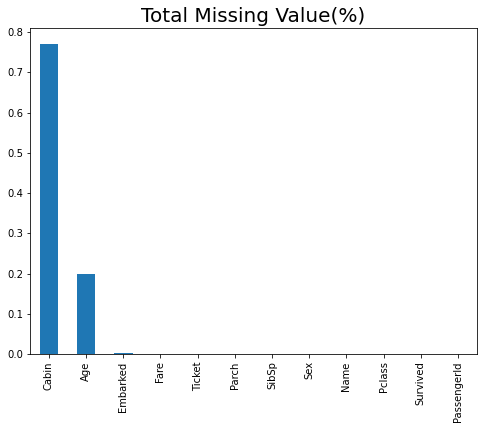

In [24]:
percent.plot(kind='bar', figsize=(8,6), fontsize=10)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.title("Total Missing Value(%)", fontsize=20)

In [25]:
percent

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [27]:
import missingno as msno

In [28]:
missingdata_df = train.columns[train.isnull().any()].tolist()

In [29]:
missingdata_df

['Age', 'Cabin', 'Embarked']

Text(0.5, 1.0, 'Correlation with Missing Values')

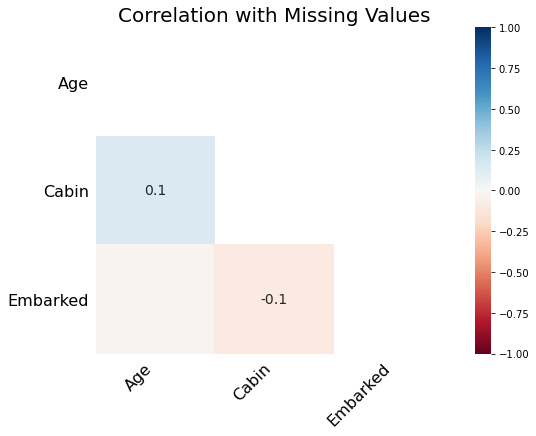

In [32]:
msno.heatmap(train[missingdata_df], figsize=(8,6))
plt.title("Correlation with Missing Values", fontsize=20)

In [33]:
%matplotlib inline

In [34]:
import seaborn as sns

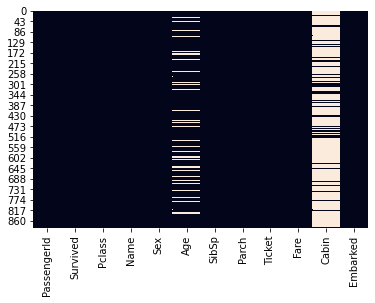

In [35]:
sns.heatmap(train.isnull(), cbar=False)

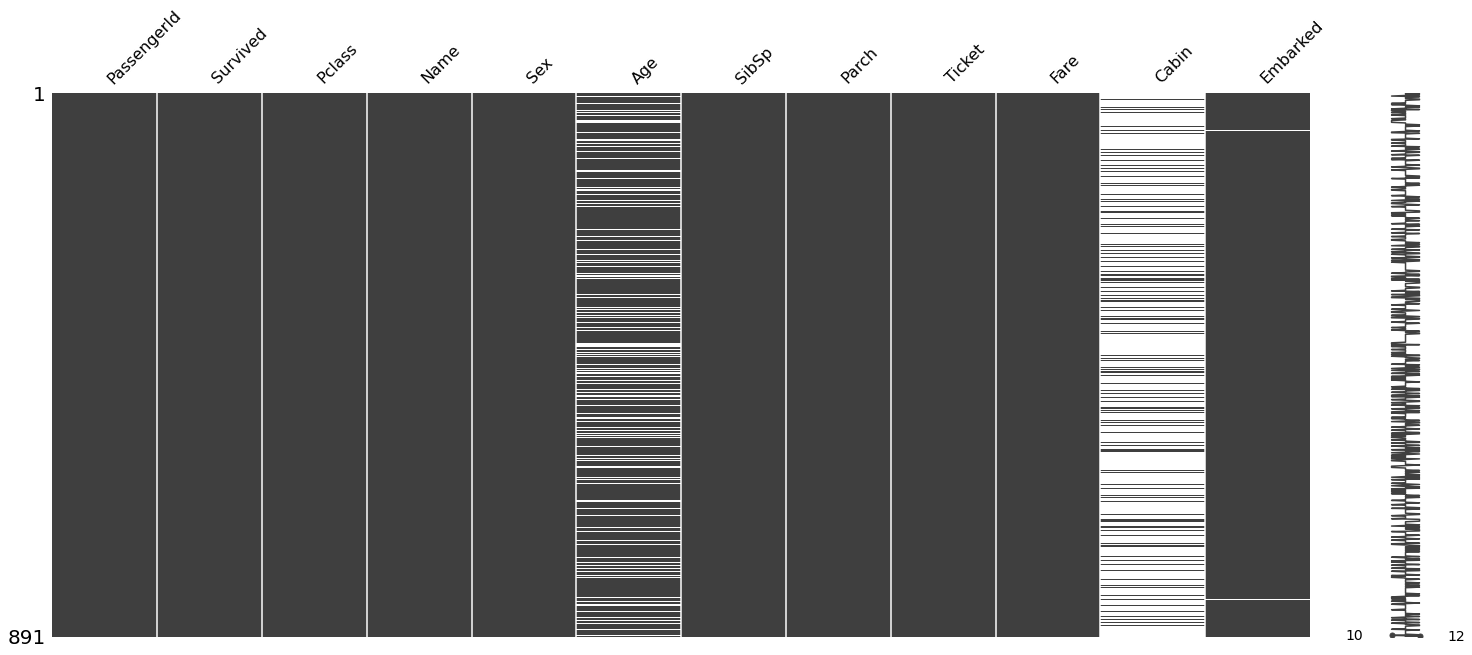

In [36]:
msno.matrix(train)

In [40]:
def if_null(x) :
    if x is True: return 0
    else : return 1

In [41]:
train['hasCabin'] = train['Cabin'].isnull().apply(if_null)

In [43]:
train['hasAge'] = train['Age'].isnull().apply(if_null)

In [44]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,hasAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


In [49]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'hasCabin', 'hasAge'],
      dtype='object')

In [54]:
df_train = train.loc[:,['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp','Parch', 'Ticket', 'Fare', 'hasCabin', 'hasAge']]

In [55]:
df_train.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,hasCabin,hasAge
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652,0.012658,0.019919,0.020167
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629,0.257307,0.316912,0.092197
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.725541,-0.172933
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838,0.159651,-0.040460,-0.018958
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000,0.216225,0.036987,0.124104
Fare,0.012658,0.257307,-0.549500,0.159651,0.216225,1.000000,0.482075,0.100707
hasCabin,0.019919,0.316912,-0.725541,-0.040460,0.036987,0.482075,1.000000,0.144111
hasAge,0.020167,0.092197,-0.172933,-0.018958,0.124104,0.100707,0.144111,1.000000


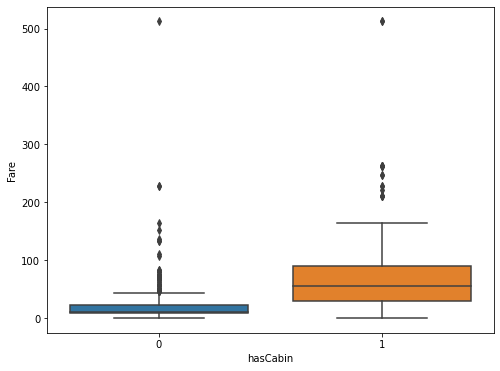

In [56]:
data = df_train.loc[:,['Fare','hasCabin']]
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='hasCabin', y='Fare', data=data)

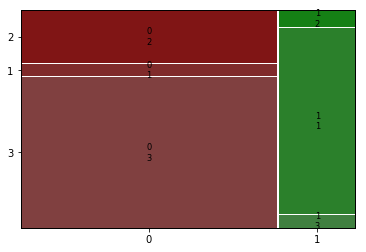

In [63]:
from statsmodels.graphics.mosaicplot import mosaic

data2 = df_train.loc[:,['Pclass','hasCabin']]
mosaic(data2,['hasCabin', 'Pclass'])
plt.show()

In [66]:
df_train = pd.read_csv("train.csv")

In [67]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


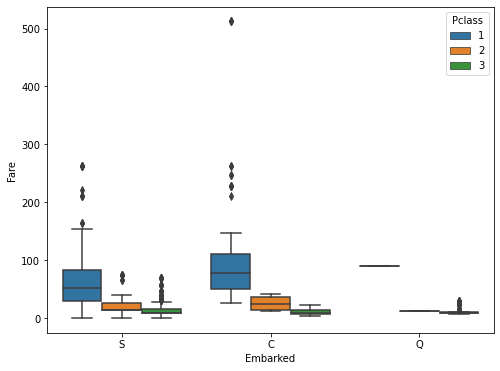

In [70]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Embarked',y='Fare',hue='Pclass', data = df_train)

In [73]:
df_train[np.logical_and(df_train['Embarked']=='S',df_train['Pclass']==1)]['Fare'].describe()

count    127.000000
mean      70.364862
std       58.811278
min        0.000000
25%       29.250000
50%       52.000000
75%       83.475000
max      263.000000
Name: Fare, dtype: float64

In [74]:
df_train[np.logical_and(df_train['Embarked']=='C',df_train['Pclass']==1)]['Fare'].describe()  

count     85.000000
mean     104.718529
std       99.093935
min       26.550000
25%       49.500000
50%       78.266700
75%      110.883300
max      512.329200
Name: Fare, dtype: float64

In [75]:
df_train['Embarked'] = df_train['Embarked'].fillna('C')

In [76]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

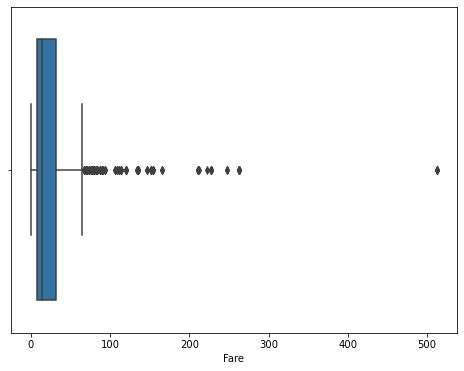

In [77]:
f,ax = plt.subplots(figsize=(8,6))
sns.boxplot(df_train['Fare'])

In [78]:
df_train[df_train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [79]:
df_train[df_train['Fare']>=400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [80]:
df_train[df_train['Ticket']=='PC 17755']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [81]:
df_train[df_train['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


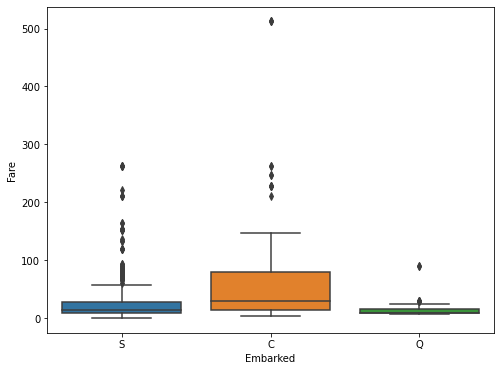

In [83]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Embarked',y='Fare',data = df_train)

In [84]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Counts')

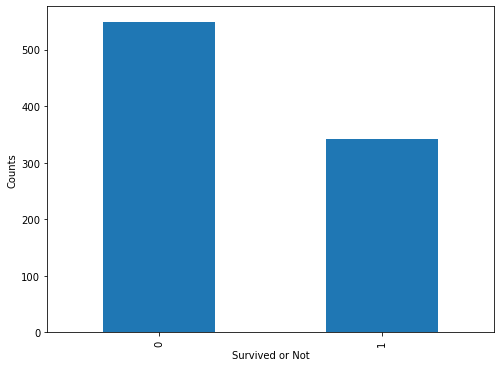

In [90]:
f, ax = plt.subplots(figsize=(8,6))
df_train['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived or Not')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

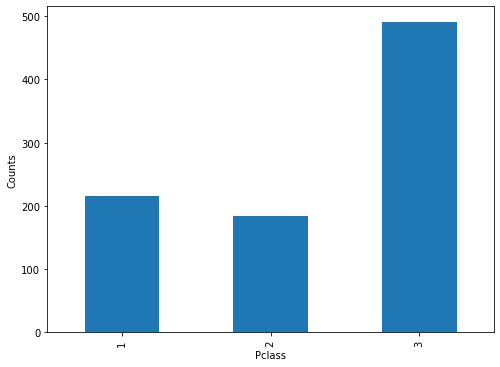

In [92]:
f, ax = plt.subplots(figsize=(8,6))
df_train['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Counts')

In [96]:
df_train[['Pclass','Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [97]:
df_train[['Pclass','Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [112]:
plt.rcParams["figure.figsize"] = (8,6)

Text(0, 0.5, 'Probability')

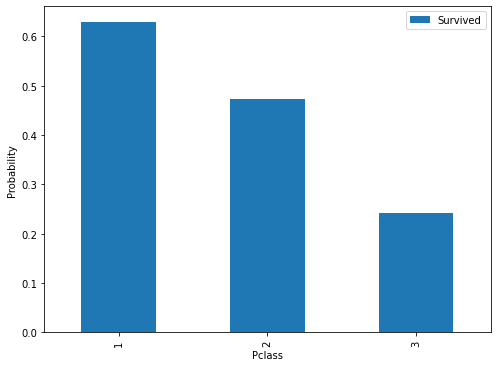

In [113]:
df_train[['Pclass','Survived']].groupby('Pclass').mean().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Probability')

Text(0, 0.5, 'Count')

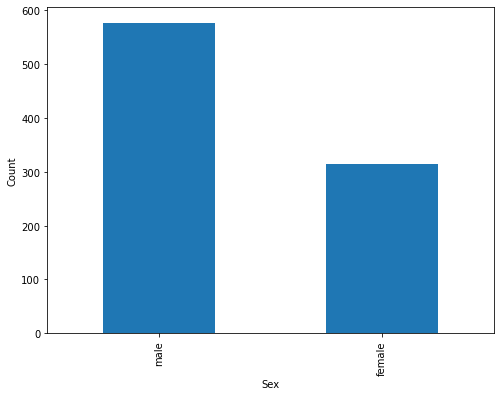

In [114]:
df_train['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0, 0.5, 'Probability')

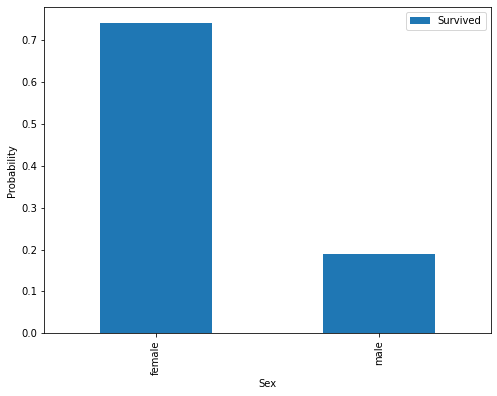

In [117]:
df_train[['Sex','Survived']].groupby('Sex').mean().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Probability')

Text(0, 0.5, 'Count')

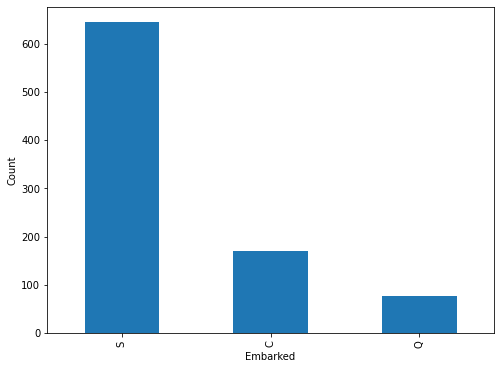

In [118]:
df_train['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')

Text(0, 0.5, 'Probability')

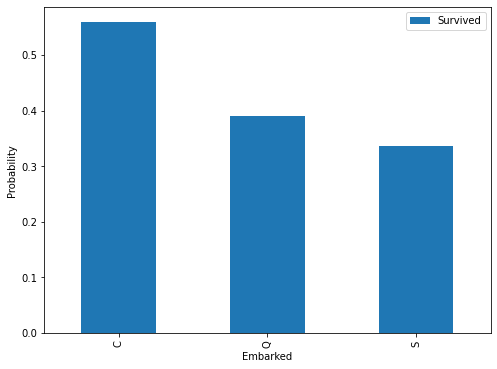

In [119]:
df_train[['Embarked','Survived']].groupby('Embarked').mean().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Probability')

In [120]:
df_train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.558824
Q,0.389610
S,0.336957


Text(0, 0.5, 'Count')

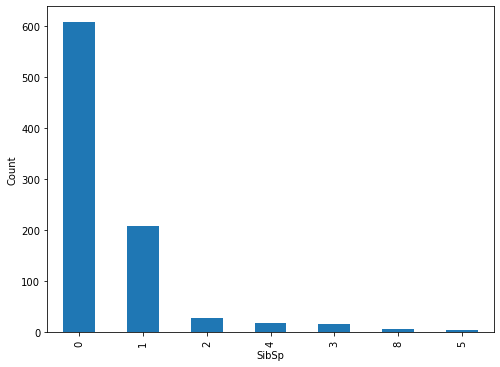

In [123]:
df_train['SibSp'].value_counts().plot(kind='bar')
plt.xlabel('SibSp')
plt.ylabel('Count')

In [124]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0, 0.5, 'Probability')

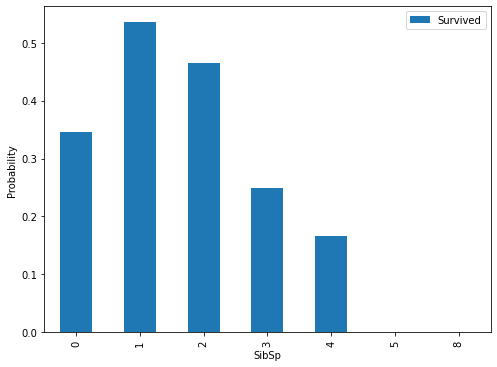

In [125]:
df_train[['SibSp','Survived']].groupby('SibSp').mean().plot(kind='bar')
plt.xlabel('SibSp')
plt.ylabel('Probability')

Text(0, 0.5, 'Count')

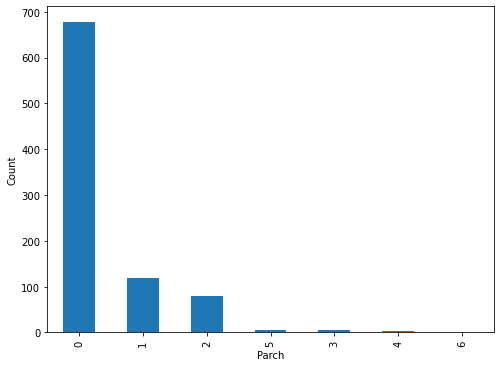

In [127]:
df_train['Parch'].value_counts().plot(kind='bar')
plt.xlabel('Parch')
plt.ylabel('Count')

Text(0, 0.5, 'Probability')

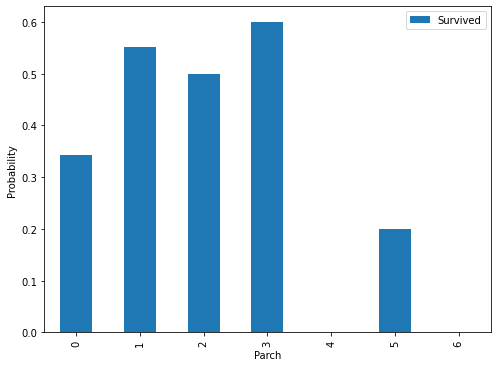

In [128]:
df_train[['Parch','Survived']].groupby('Parch').mean().plot(kind='bar')
plt.xlabel('Parch')
plt.ylabel('Probability')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


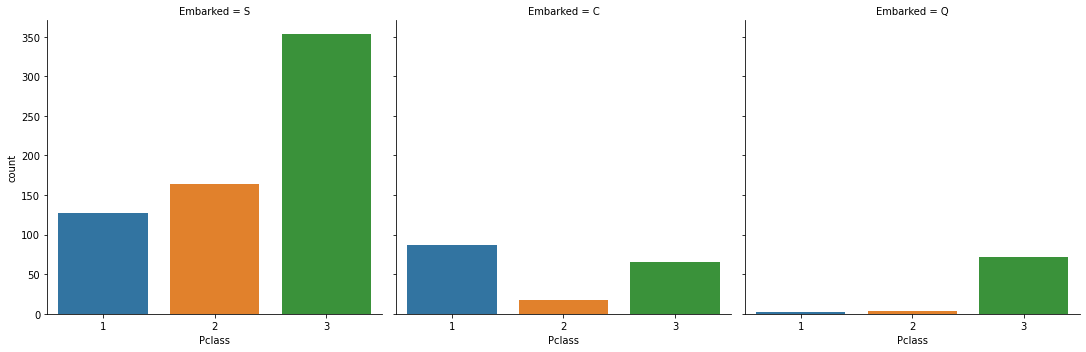

In [129]:
sns.factorplot('Pclass', col = 'Embarked', data = df_train, kind='count')

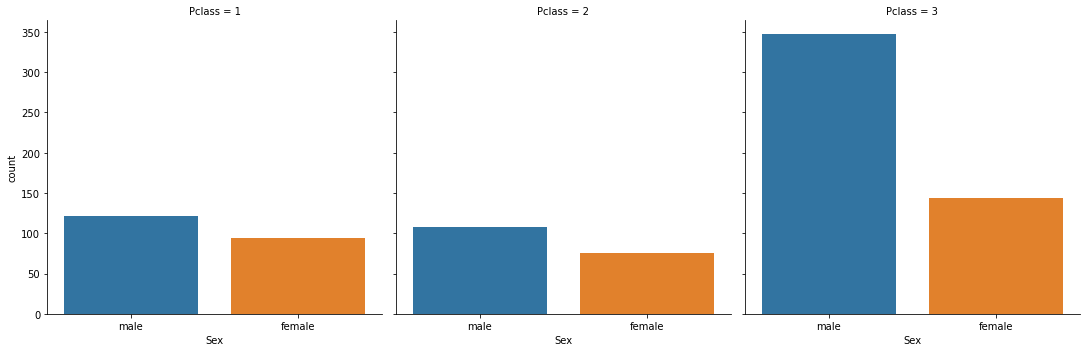

In [131]:
sns.factorplot('Sex', col = 'Pclass', data = df_train, kind='count')

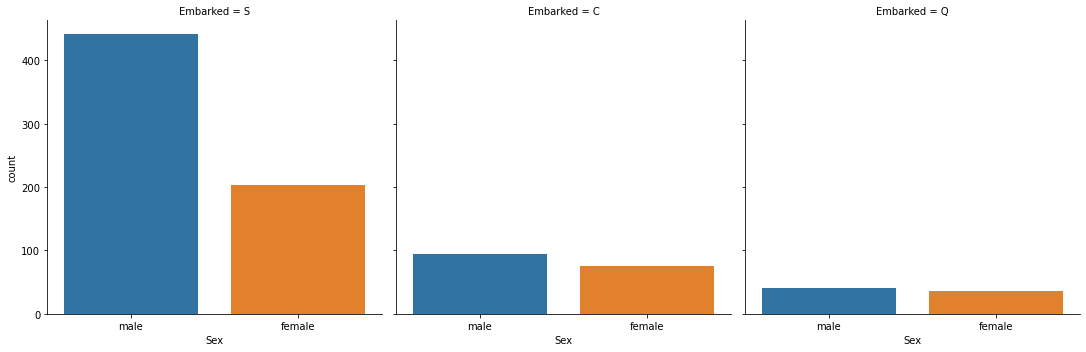

In [132]:
sns.factorplot('Sex', col = 'Embarked', data = df_train, kind='count')

In [133]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [134]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [135]:
df_train = df_train.drop(columns=['Ticket','PassengerId','Cabin','SibSp','Parch'])

In [136]:
df_train

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,1


In [137]:
df_train['Sex'] = df_train['Sex'].map({'male' : 0, 'female' : 1})
            
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

In [138]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,2,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,2,2
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,2,1


In [139]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [140]:
df_train = df_train.drop(columns='Name')

In [141]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Ms            1
Capt          1
Lady          1
Don           1
Countess      1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

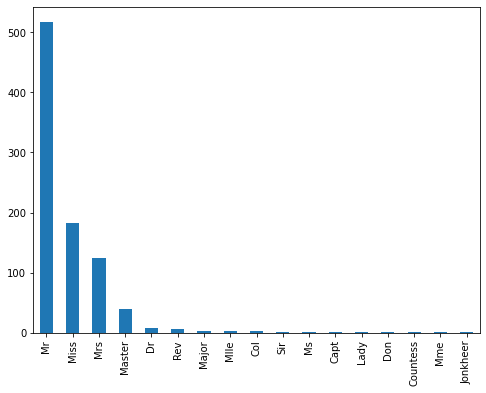

In [142]:
df_train['Title'].value_counts().plot(kind='bar')

In [144]:
df_train['Title'] = df_train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'],'Others')
df_train['Title'] = df_train['Title'].replace('Ms','Miss')
df_train['Title'] = df_train['Title'].replace('Mme','Mrs')
df_train['Title'] = df_train['Title'].replace('Mlle','Miss')

Text(0, 0.5, 'count')

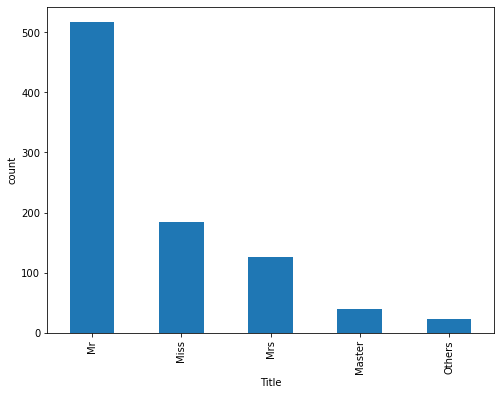

In [145]:
df_train['Title'].value_counts().plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('count')

Text(0, 0.5, 'Survival Probability')

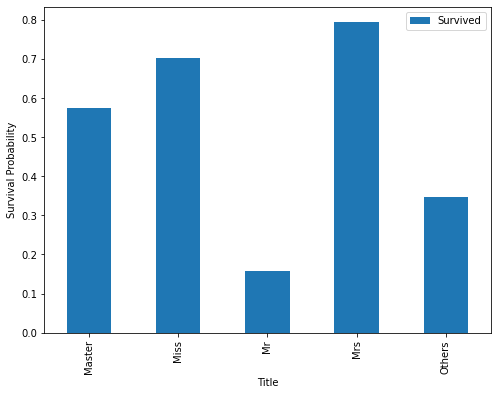

In [147]:
df_train[['Title','Survived']].groupby('Title').mean().plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Survival Probability')

In [149]:
df_train['Title'] = df_train['Title'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Others':4})

In [150]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,7.2500,2,2,2
1,1,1,1,38.0,71.2833,0,2,3
2,1,3,1,26.0,7.9250,2,1,1
3,1,1,1,35.0,53.1000,2,2,3
4,0,3,0,35.0,8.0500,2,1,2


In [151]:
corr_matrix = df_train.corr()

In [152]:
corr_matrix

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
Survived,1.000000,-0.338481,0.543351,-0.077221,0.257307,-0.174199,0.016639,-0.071174
Pclass,-0.338481,1.000000,-0.131900,-0.369226,-0.549500,0.170334,0.065997,-0.181177
Sex,0.543351,-0.131900,1.000000,-0.093254,0.182333,-0.115513,0.200988,-0.060299
Age,-0.077221,-0.369226,-0.093254,1.000000,0.096067,-0.040248,-0.301914,0.508856
Fare,0.257307,-0.549500,0.182333,0.096067,1.000000,-0.229304,0.217138,-0.013273
Embarked,-0.174199,0.170334,-0.115513,-0.040248,-0.229304,1.000000,0.069434,0.004439
FamilySize,0.016639,0.065997,0.200988,-0.301914,0.217138,0.069434,1.000000,-0.202145
Title,-0.071174,-0.181177,-0.060299,0.508856,-0.013273,0.004439,-0.202145,1.000000


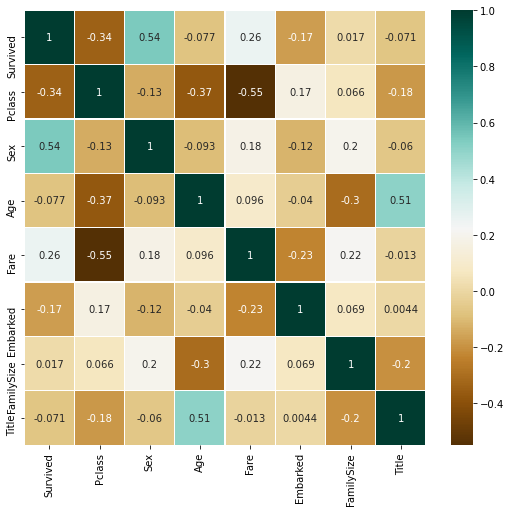

In [154]:
plt.figure(figsize=(9, 8))
sns.heatmap(data=corr_matrix, cmap='BrBG', annot=True, linewidths=0.2)

In [155]:
df_train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        0
FamilySize      0
Title           0
dtype: int64

In [156]:
NaN_indexes = df_train[df_train['Age'].isnull()].index

In [157]:
NaN_indexes

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [159]:
type(NaN_indexes)

pandas.core.indexes.numeric.Int64Index

In [161]:
df_train[['Age','Pclass','FamilySize']].corr()

,Age,Pclass,FamilySize
Age,1.000000,-0.369226,-0.301914
Pclass,-0.369226,1.000000,0.065997
FamilySize,-0.301914,0.065997,1.000000


In [168]:
for i in NaN_indexes :
    pred_age = df_train[((df_train['Pclass']==df_train.iloc[i]['Pclass']) & (df_train['FamilySize']==df_train.iloc[i]['FamilySize']))]['Age'].median()
    if not np.isnan(pred_age) :
        df_train['Age'].iloc[i] = pred_age       
    else :        
        df_train['Age'].iloc[i] = df_train['Age'].median()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [170]:
df_train['Age'].isnull().sum()

0

In [171]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,7.2500,2,2,2
1,1,1,1,38.0,71.2833,0,2,3
2,1,3,1,26.0,7.9250,2,1,1
3,1,1,1,35.0,53.1000,2,2,3
4,0,3,0,35.0,8.0500,2,1,2


In [172]:
df_test = pd.read_csv('test.csv')

In [173]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [174]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [178]:
df_test = df_test.drop(columns=['PassengerId','Ticket','Cabin'])

In [179]:
df_test['Sex'] = df_test['Sex'].map({'male':0,'female':1})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [181]:
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_test = df_test.drop(columns='Name')

df_test['Title'] = df_test['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
            
df_test['Title'] = df_test['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [182]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,1,2.0
1,3,1,47.0,1,0,7.0000,2,3.0
2,2,0,62.0,0,0,9.6875,1,2.0
3,3,0,27.0,0,0,8.6625,2,2.0
4,3,1,22.0,1,1,12.2875,2,3.0


In [183]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [184]:
df_test[df_test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,3,0,60.5,0,0,NaN,2,2.0


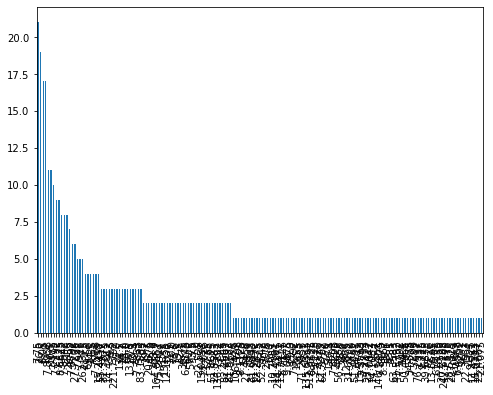

In [187]:
df_test['Fare'].value_counts().plot(kind='bar')

In [188]:
df_test.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
Pclass,1.000000,-0.108615,-0.492143,0.001087,0.018721,-0.577147,0.227983,-0.266829
Sex,-0.108615,1.000000,-0.000013,0.099943,0.159120,0.191514,-0.076281,0.045774
Age,-0.492143,-0.000013,1.000000,-0.091587,-0.061249,0.337932,-0.175848,0.533019
SibSp,0.001087,0.099943,-0.091587,1.000000,0.306895,0.171539,0.052708,-0.146468
Parch,0.018721,0.159120,-0.061249,0.306895,1.000000,0.230046,0.054577,-0.030414
Fare,-0.577147,0.191514,0.337932,0.171539,0.230046,1.000000,-0.257183,0.094407
Embarked,0.227983,-0.076281,-0.175848,0.052708,0.054577,-0.257183,1.000000,-0.062355
Title,-0.266829,0.045774,0.533019,-0.146468,-0.030414,0.094407,-0.062355,1.000000


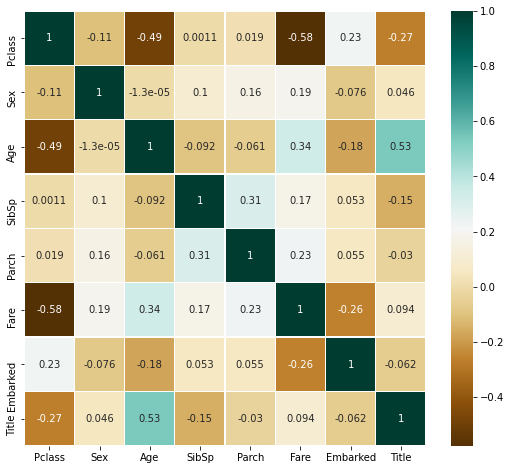

In [190]:
corr_matrix_2 = df_test.corr()
            
plt.figure(figsize=(9, 8))
sns.heatmap(data=corr_matrix_2, cmap='BrBG', annot=True, linewidths=0.2)

In [191]:
df_test[df_test['Age']>60]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
2,2,0,62.0,0,0,9.6875,1,2.0
13,2,0,63.0,1,0,26.0000,2,2.0
81,1,0,67.0,1,0,221.7792,2,2.0
96,1,1,76.0,1,0,78.8500,2,3.0
114,1,1,63.0,1,0,221.7792,2,3.0
142,1,0,61.0,1,3,262.3750,0,2.0
152,3,0,60.5,0,0,NaN,2,2.0
179,1,1,64.0,0,2,83.1583,0,3.0
193,2,0,61.0,0,0,12.3500,1,2.0
236,1,0,64.0,1,0,75.2500,0,2.0


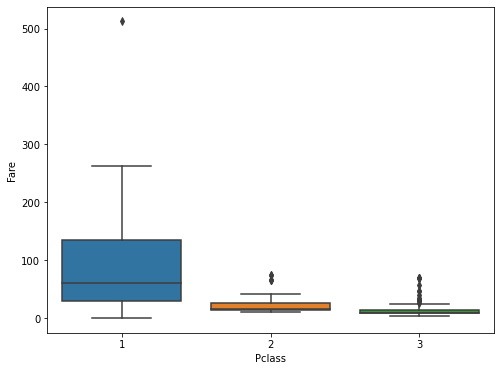

In [192]:
sns.boxplot(x='Pclass',y='Fare',data=df_test)

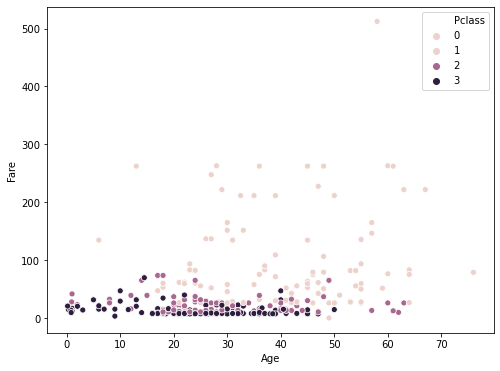

In [197]:
sns.scatterplot(x='Age',y='Fare',hue='Pclass', data=df_test)

In [199]:
Fare_NaN_index = df_test[df_test['Fare'].isnull()].index

In [201]:
for i in Fare_NaN_index :
    df_test.iloc[i]['Fare'] = df_test[df_test['Pclass']==1]['Fare'].median

<ipython-input-201-39d5e8d7fc60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.iloc[i]['Fare'] = df_test[df_test['Pclass']==1]['Fare'].median
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)


In [202]:
df_test[df_test['Title'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1,1,39.0,0,0,108.9,0,NaN


In [203]:
df_test[df_test['Sex']==1]['Title'].value_counts()

1.0    79
3.0    72
Name: Title, dtype: int64

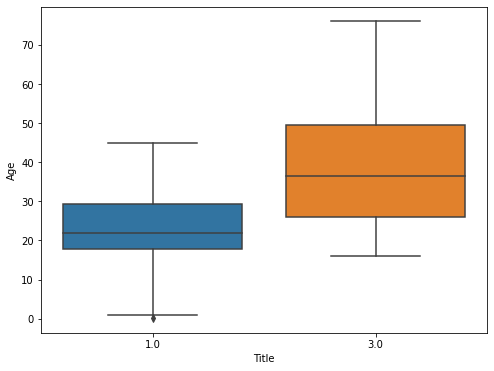

In [204]:
sns.boxplot(x='Title',y='Age',data=df_test[df_test['Sex']==1])

In [205]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [207]:
df_test = df_test.drop(columns=['SibSp','Parch'])

In [210]:
Age_NaN_indexes = df_test[df_test['Age'].isnull()].index
for i in Age_NaN_indexes :
    pred_age = df_test[(df_test['FamilySize']==df_test.iloc[i]['FamilySize'])&(df_test['Pclass']==df_test.iloc[i]['Pclass'])]['Age'].median()
    if not np.isnan(pred_age) :
        df_test['Age'].iloc[i] = pred_age
    else :
        df_test['Age'].iloc[i] = df_test['Age'].median()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [211]:
df_test['Age'].isnull().sum()

0

In [212]:
type(train['Survived'])

pandas.core.series.Series

In [213]:
from sklearn.utils import shuffle

In [214]:
df_train = shuffle(df_train)

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
train_set, validation_set = train_test_split(df_train, test_size=0.25)

In [218]:
X_train = train_set.drop(columns='Survived')
Y_train = train_set['Survived']

X_valid = validation_set.drop(columns='Survived')
Y_valid = validation_set['Survived']

X_test = df_test